Поиск по "computer science".

Поиск по названиям статей, а не по авторам.

Найти все совпадения в iccs, получить всех авторов этих статей и по ним создать граф.

Удалить одинаковые записи найденные в OpenAlex, убрать те что с расширением.

Проверить источники найденных статей.

Найти статьи, которые не нашлись в OpenAlex.(Понять почему не нашлось (Мб изменили название или какая-то другая проблема)). Найти количество, которые не найдены и узнать его долю от всех статей в iccs.

Сделать граф и все остальное по нему.

Все возможные найденные ребра: найти по ним статистику: Сколько всего случаев. Какое расстояние между авторами было до появления соавторства? Как по годам распределены случаи? Какой у них индекс Хирша? И прочее.

Так. А вот этот количество статей для года? Для соавторов которые появились на ICCS? Или как? Фильтр по концепту лучше не ставить. А вот источник посмотри - какой там. Должен быть ProcCS или LNCS


Индекс Хирша скорее всего там уже должен быть посчитан. Другое дело, что он там какой-то "актуальный", а нам может быть интересно для года, в который считаем. Так что научиться вычислять можно


Про графы, кажется, для начала достаточно невзвешенные по соавторству. Но при этом разделять соавторство на ICCS вообще


Но давай по порядку:
1) Четко посчитать сколько статей нашлось для каждого года.
2) Для всех авторов найти все их публикации и всех соавторов за все годы. Сохранить аккуратно в табличку - это у нас ключевая база.
3) Найти случаи соавторства "впервые". Т.е. два автора - соавторы на ICCS в год N, но в годы (-∞; N-1] они не соавторы. Другой вариант: найти для каждой пары соавторов с ICCS список их совместных публикаций, посчитать долю списков, в которых первая по хронологии публикация - на ICCS.

In [ ]:
#Поиск информации о статьях и сохранение результатов без concept
import pandas as pd
import requests
import time

def get_publication_info(title):
    base_url = "https://api.openalex.org/works"
    params = {
        "filter": f"title.search:{title}"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        results = response.json().get('results', [])
        if results:
            return results[0]
        else:
            return None
    else:
        print(f"Ошибка при запросе данных для публикации '{title}': {response.status_code}")
        return None

input_file = '/content/drive/MyDrive/NIR/Data/submission_complete.csv'
publications_df = pd.read_csv(input_file)
publications_df = publications_df[publications_df['decision']=='ACCEPT']

found_publications = []
not_found_publications = []

for title in publications_df['title']:
    publication_info = get_publication_info(title)
    if publication_info:
        found_publications.append(publication_info)
    else:
        not_found_publications.append(title)
    time.sleep(0.1)

found_publications_df = pd.DataFrame(found_publications)

found_publications_df.to_csv('found_publications.csv', index=False)

total_articles = len(publications_df)
not_found_ratio = len(not_found_publications) / total_articles

print(f"Количество ненайденных статей: {len(not_found_publications)}")
print(f"Доля ненайденных статей: {not_found_ratio:.2%}")

not_found_publications_df = pd.DataFrame(not_found_publications)
not_found_publications_df.to_csv('not_found_publications.csv', index=False)

Ошибка при запросе данных для публикации 'Computing, a powerful tool in flood prediction': 403
Ошибка при запросе данных для публикации 'Big Data meets Computational Science, preface for ICCS 2014': 403
Ошибка при запросе данных для публикации 'ADAMANT: tools to capture, analyze, and manage data movement': 403
Ошибка при запросе данных для публикации 'Data through the Computational Lens, Preface for ICCS 2016': 403
Ошибка при запросе данных для публикации 'Accurate, Automatic and Compressed Visualization of Radiated Helmholtz Fields from Boundary Element Solutions': 403
Ошибка при запросе данных для публикации 'Optimizing the Efficiency, Vulnerability and Robustness of Road-based Para-transit Networks using Genetic Algorithm': 403
Ошибка при запросе данных для публикации 'Personality Recognition from Source Code Based on Lexical, Syntactic and Semantic Features': 403
Ошибка при запросе данных для публикации 'A Combination of Moment Descriptors, Fourier Transform and Matching Measures f

Procedia computer science

Lecture notes in computer science

In [ ]:
import pandas as pd
import ast
data = pd.read_csv('/content/found_publications.csv')
filtered_data = data[data['primary_location'].str.contains("Procedia computer science") | \
                     data['primary_location'].str.contains("Lecture notes in computer science")]

filtered_data.to_csv('filter.csv', index=False)

Данные о тех кто не был найден в openalex

In [ ]:
not_found = pd.read_csv('/content/not_found_publications.csv', sep = ';')
submission = pd.read_csv('/content/submission_complete.csv')

matched = submission[submission['title'].isin(not_found['title'])]
matched.to_csv('not_found1.csv', index=False)

Сколько статей нашлось для каждого года

publication_year
2014    54
2015    59
2016    48
2017    67
2018    47
2019    67
2020    85
Name: count, dtype: int64


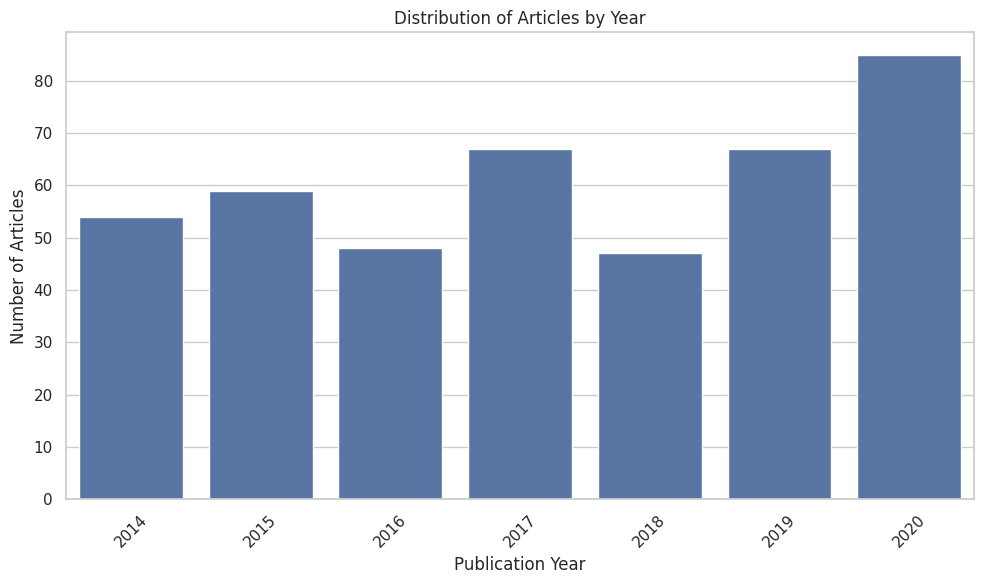

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

publications_df = pd.read_csv('/content/found_publications_filtered.csv')
year_counts = publications_df['publication_year'].value_counts().sort_index()

print(publications_df['publication_year'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x=year_counts.index, y=year_counts.values)

plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Публикации и соавторы для каждого автора.
Сохранить красиво в таблицу**

Id каждого автора из ICCS

In [ ]:
import pandas as pd
import ast

publications_df = pd.read_csv('/content/found_publications_filtered.csv')

author_ids = []

for authorships in publications_df['authorships']:
  authorships = ast.literal_eval(authorships)
  for author in authorships:
    author_ids.append(author['author']['id'])

print(author_ids)

['https://openalex.org/A5063614815', 'https://openalex.org/A5020388832', 'https://openalex.org/A5027208445', 'https://openalex.org/A5080295497', 'https://openalex.org/A5035362511', 'https://openalex.org/A5036500408', 'https://openalex.org/A5028531406', 'https://openalex.org/A5054727446', 'https://openalex.org/A5016869597', 'https://openalex.org/A5027254754', 'https://openalex.org/A5062825673', 'https://openalex.org/A5082055441', 'https://openalex.org/A5007295468', 'https://openalex.org/A5083022537', 'https://openalex.org/A5068403289', 'https://openalex.org/A5001342072', 'https://openalex.org/A5038375764', 'https://openalex.org/A5023391278', 'https://openalex.org/A5023159468', 'https://openalex.org/A5085561586', 'https://openalex.org/A5049879975', 'https://openalex.org/A5090503795', 'https://openalex.org/A5057608588', 'https://openalex.org/A5016476060', 'https://openalex.org/A5003283875', 'https://openalex.org/A5032808401', 'https://openalex.org/A5011609464', 'https://openalex.org/A5018

Информация о каждом авторе

In [ ]:
import requests
import pandas as pd

def func_author_data(author_id):
    url = f"https://api.openalex.org/authors/{author_id.split('/')[-1]}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {author_id}")
        return None

all_authors_data = []

for author_id in author_ids:
    author_data = func_author_data(author_id)
    if author_data:
        all_authors_data.append(author_data)

authors_df = pd.DataFrame(all_authors_data)

In [ ]:
len_array = authors_df['id'].value_counts().values
print(set(len_array))

{1, 2, 3, 4, 5, 6, 7, 8}


In [ ]:
authors_df_unique = authors_df.drop_duplicates(subset = 'id')

len_array = authors_df_unique['id'].value_counts().values
print(set(len_array))

authors_df.to_csv('authors_data.csv', index=False)

{1}


История публикаций каждого автора и их соавторы

In [ ]:
import requests
import pandas as pd

authors_data = pd.read_csv('/content/authors_data.csv')

def works_for_author(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json().get('results', [])
    else:
        print("Error")
        return []

all_works_data = []

for author_works in authors_data['works_api_url']:
    works = works_for_author(author_works)
    for work in works:
      authors = [author['author']['display_name'] for author in work.get('authorships', [])]
      filtered_data = {
            'author_id': author_works.split(':')[-1],
            'cited_by_count': work.get('cited_by_count', None),
            'publication_name': work.get('display_name', None),
            'referenced_works_count': work.get('referenced_works_count', None),
            'cited_by_api_url': work.get('cited_by_api_url', None),
            'counts_by_year': work.get('counts_by_year', None),
            'publication_year': work.get('publication_year', None),
            'authors': authors
      }
      all_works_data.append(filtered_data)

authors_publications_df = pd.DataFrame(all_works_data)

authors_publications_df.to_csv('authors_publications_data.csv', index=False)

print('success')

success


Делаем один датасет со всем нужным

In [ ]:
import pandas as pd

# authors = pd.read_csv('authors_data.csv')
publications = pd.read_csv('authors_publications_data.csv')

# selected_columns_authors = authors[['id', 'display_name', 'works_count', 'cited_by_count', 'counts_by_year']]
# selected_columns_authors = selected_columns_authors.rename(columns={
#     'id' : 'id',
#     'display_name' : 'author_ICCS_name',
#     'works_count' : 'author_ICCS_works_count',
#     'cited_by_count' : 'author_ICCS_cited_by_year',
#     'counts_by_year' : 'author_ICCS_counts_by_year'
# })

# selected_columns_authors['id'] = selected_columns_authors['id'].apply(lambda x: x.split('/')[-1])

selected_columns_publications = publications[['author_id', 'publication_name', 'authors', 'cited_by_count', 'counts_by_year', 'publication_year']]
selected_columns_publications = selected_columns_publications.rename(columns={
    'author_id' : 'id',
    'publication_name' : 'publication_name',
    'authors' : 'publication_authors',
    'cited_by_count' : 'publication_cited_by_count',
    'counts_by_year' : 'publication_counts_by_year',
    'publication_year' : 'publication_year'
})

# merged_df = pd.merge(selected_columns_publications, selected_columns_authors, on='id', how='left')

# merged_df = merged_df.drop(columns = ['id'])

# merged_df.to_csv('authors_and_publications_complete.csv', index=False)

selected_columns_publications.to_csv('authors_and_publications_complete.csv', index=False)

print("success")

success


In [ ]:
data = pd.read_csv('/content/authors_and_publications_complete.csv')
data = data.drop_duplicates()
data.to_csv('authors_and_publications_complete.csv', index=False)

In [ ]:
data = pd.read_csv('/content/authors_and_publications_complete.csv')
data.head()

,id,publication_name,publication_authors,publication_cited_by_count,publication_counts_by_year,publication_year
0,A5063614815,SparseHC: A Memory-efficient Online Hierarchic...,"['Thuy-Diem Nguyen', 'Bertil Schmidt', 'Chee K...",28,"[{'year': 2024, 'cited_by_count': 2}, {'year':...",2014
1,A5063614815,Efficient and Accurate OTU Clustering with GPU...,"['Thuy-Diem Nguyen', 'Bertil Schmidt', 'Zejun ...",6,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2015
2,A5063614815,Efficient agglomerative hierarchical clusterin...,"['Thuy-Diem Nguyen', 'Chee-Keong Kwoh']",4,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2015
3,A5063614815,CRiSPy-CUDA: Computing Species Richness in 16S...,"['Zejun Zheng', 'Thuy-Diem Nguyen', 'Bertil Sc...",4,"[{'year': 2018, 'cited_by_count': 1}, {'year':...",2011
4,A5063614815,Fast dendrogram-based OTU clustering using seq...,"['Thuy-Diem Nguyen', 'Bertil Schmidt', 'Chee-K...",3,"[{'year': 2017, 'cited_by_count': 1}, {'year':...",2014


Датасет с публикациями в ICCS. Только авторы, название публикации и год публикации

In [ ]:
import ast

data = pd.read_csv('/content/found_publications_filtered.csv')
data = data[['title','publication_year','authorships']]
data['authorships'] = data['authorships'].apply(ast.literal_eval)

def extract_author_names(authorships):
    return [author['author']['display_name'] for author in authorships]

data['authorships'] = data['authorships'].apply(extract_author_names)

data.to_csv('publications_ICCS.csv', index=False)

data.head()

,title,publication_year,authorships
0,SparseHC: A Memory-efficient Online Hierarchic...,2014,"[Thuy-Diem Nguyen, Bertil Schmidt, Chee Keong ..."
1,A Workflow Application for Parallel Processing...,2014,[Paweł Czarnul]
2,Measuring the Reputation in User-generated-con...,2014,"[Leila Weitzel, José Palazzo M. de Oliveira, P..."
3,Using Interactive 3D Game Play to Make Complex...,2014,[Dale Patterson]
4,Characteristics of Dynamical Phase Transitions...,2014,"[Muyoung Heo, Jong‐Kil Park, Kyungsik Kim]"


Убираем из complete все публикации, что есть в ICCS. Сохраняем его как Without_ICCS

In [ ]:
publications = pd.read_csv('/content/authors_and_publications_complete.csv')
ICCS_publications = pd.read_csv('/content/publications_ICCS.csv')

publications = publications[~publications['publication_name'].isin(ICCS_publications['title'])]

publications.to_csv('publications_without_ICCS.csv', index=False)

Найти случаи соавторства "впервые". Т.е. два автора - соавторы на ICCS в год N, но в годы (-∞; N-1] они не соавторы. Другой вариант: найти для каждой пары соавторов с ICCS список их совместных публикаций, посчитать долю списков, в которых первая по хронологии публикация - на ICCS.

До 20 соавторов

In [ ]:
import ast
from itertools import combinations
import numpy as np
import pandas as pd

ICCS = pd.read_csv('/content/publications_ICCS.csv')
not_ICCS = pd.read_csv('/content/publications_without_ICCS.csv')

#title-publication_name, publication_year-publication_year, authorships-publication_authors

ICCS['authorships'] = ICCS['authorships'].apply(lambda x: ast.literal_eval(x))
ICCS = ICCS[ICCS['authorships'].apply(lambda x: len(x)>=2)]
not_ICCS['publication_authors']=not_ICCS['publication_authors'].apply(lambda x: ast.literal_eval(x))

all_found_coauthors = []

#Если True, значит они раньше были соавторами
def func_find_coauthor(all_pairs, year):
  for pair in all_pairs:
    found = False
    for _, row in not_ICCS.iterrows():
      flag = set(pair).issubset(row['publication_authors'])
      if flag and year < row['publication_year']:
        # all_found_coauthors.append(pair)
        pair_year = pair
        pair_year.append(year)
        all_found_coauthors.append(pair_year)
        print(pair_year)
        return True
  return found

counter = 0

for _, row in ICCS.iterrows():
  authors = row['authorships']
  all_pairs = []
  for i in range(len(authors)):
    for j in range(i + 1, len(authors)):
        all_pairs.append([authors[i], authors[j]])
  if func_find_coauthor(all_pairs, row['publication_year']) == True:
    counter += 1

print(counter)

['Thuy-Diem Nguyen', 'Bertil Schmidt', 2014]
['Leila Weitzel', 'José Palazzo M. de Oliveira', 2014]
['Martin Schreiber', 'Philipp Neumann', 2014]
['José-Matías Cutillas-Lozano', 'Domingo Giménez', 2014]
['Luke Bermingham', 'Ickjai Lee', 2014]
['Alexandru Mizeranschi', 'Paul D. Thompson', 2014]
['José J. López‐Espín', 'Juan Aparicio', 2014]
['Gregorio Bernabé', 'Javier Cuenca', 2014]
['Enrico Calore', 'Sebastiano Fabio Schifano', 2014]
['Pedro Valero‐Lara', 'Alfredo Pinelli', 2014]
['Vijayalakshmi Ramasamy', 'Naga Dasari', 2014]
['Nidhi Tiwari', 'Santonu Sarkar', 2014]
['Francisco Borges', 'Albert Gutierrez-Milla', 2014]
['Kei‐ichi Tainaka', 'Jin Yoshimura', 2014]
['Edson N. Cáceres', 'Henrique Mongelli', 2014]
['David J. Warne', 'Neil A. Kelson', 2014]
['Hélène Coullon', 'Sébastien Limet', 2014]
['Andrew Adinetz', 'Andreas Herten', 2014]
['Keiji Yamamoto', 'Atsuya Uno', 2014]
['Chuan Zhou', 'Peng Zhang', 2014]
['Fenhua Li', 'Jing He', 2014]
['Wei Liang Quek', 'Lock Yue Chew', 2014]
['W

In [ ]:
res = []
[res.append(x) for x in all_found_coauthors if x not in res]
len(res)

342

In [ ]:
with open('list.txt', 'w') as f:
  for line in res:
    f.write(f'{line}\n')

Доля соавторов, которые встретились на ICCS впервые

In [ ]:
print(342/ICCS['title'].count())

0.8240963855421687


Создаем граф соавторов

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
import time

publications_df = pd.read_csv('/content/authors_publications_data.csv')
publications_df['authors']=publications_df['authors'].apply(lambda x: ast.literal_eval(x))


G = nx.Graph()

for _, row in publications_df.iterrows():
    authors = row['authors']
    year = row['publication_year']

    for author in authors:
        if not G.has_node(author):
            G.add_node(author)

    for i, author1 in enumerate(authors):
        for author2 in authors[i + 1:]:
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
                G[author1][author2]['years'].append(year)
            else:
                G.add_edge(author1, author2, weight=1, years=[year])

In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Количество возможных ребер в неориентированном графе
num_possible_edges = num_nodes * (num_nodes - 1) / 2

# Вероятность появления ребра
probability_edge = num_edges / num_possible_edges

print(f"Количество вершин: {num_nodes}")
print(f"Количество ребер: {num_edges}")
print(f"Количество возможных ребер: {num_possible_edges}")
print(f"Вероятность появления ребра: {probability_edge:.4f}")

Количество вершин: 79466
Количество ребер: 1352008
Количество возможных ребер: 3157382845.0
Вероятность появления ребра: 0.0004


In [ ]:
nx.write_gml(G, 'coauthorship_network.gml')

Кратчайшее расстояние между авторами до соавторства

In [ ]:
author_A = 'Thuy-Diem Nguyen'
author_B = 'Joey Sing Yee Tan'

try:
    shortest_path_length = nx.shortest_path_length(G, author_A, author_B)
    print(f"Кратчайшее расстояние между {author_A} и {author_B} до соавторства: {shortest_path_length}")
except nx.NetworkXNoPath:
    print(f"Между {author_A} и {author_B} нет пути в графе до соавторства.")

Кратчайшее расстояние между Thuy-Diem Nguyen и Joey Sing Yee Tan до соавторства: 3


Индекс Хирша для каждого автора в ICCS на каждый год что он публиковал

In [ ]:
import pandas as pd

data = pd.read_csv('/content/authors_publications_data.csv')

def calculate_h_index(citations):
    citations = sorted(citations, reverse=True)
    h_index = 0
    for i, c in enumerate(citations):
        if c >= i + 1:
            h_index = i + 1
        else:
            break
    return h_index

grouped_data = data.groupby(['author_id', 'publication_year'])

results = []

for (author_id, year), group in grouped_data:
    citations = group['cited_by_count'].tolist()
    h_index = calculate_h_index(citations)
    results.append({'author_id': author_id, 'publication_year': year, 'h_index': h_index})

h_index_df = pd.DataFrame(results)

In [ ]:
h_index_df.head()

,author_id,publication_year,h_index
0,A5000054951,2005,1
1,A5000054951,2006,0
2,A5000054951,2017,1
3,A5000054951,2018,1
4,A5000054951,2019,1


In [ ]:
h_index_df.to_csv('author_h_index_per_year.csv', index=False)

In [ ]:
import pandas as pd

h_index_df = pd.read_csv('/content/author_h_index_per_year.csv')
author_data = pd.read_csv('/content/authors_data.csv')

h_index_df['author_id'] = 'https://openalex.org/' + h_index_df['author_id'].astype(str)

author_data = author_data.rename(columns={'id': 'author_id'})

merged_df = pd.merge(h_index_df, author_data, on='author_id', how='left')

merged_df = merged_df[['display_name',	'publication_year',	'h_index']]

merged_df.head()

,display_name,publication_year,h_index
0,Raul Vicente Garcia,2005,1
1,Raul Vicente Garcia,2006,0
2,Raul Vicente Garcia,2017,1
3,Raul Vicente Garcia,2018,1
4,Raul Vicente Garcia,2019,1


In [ ]:
merged_df.to_csv('author_h_index_per_year.csv', index=False)

In [ ]:
import pandas as pd

data = pd.read_csv('/content/author_h_index_per_year.csv')

groups = data.groupby(['display_name', 'publication_year'])

print(groups.sum())

                                 h_index
display_name   publication_year         
A. Chacn       2016                    1
A. M. Lobachev 2016                    4
               2017                    1
               2018                    1
               2019                    2
...                                  ...
Н. В. Перцев   2020                    4
               2021                    2
               2022                    2
               2023                    1
               2024                    0

[14909 rows x 1 columns]


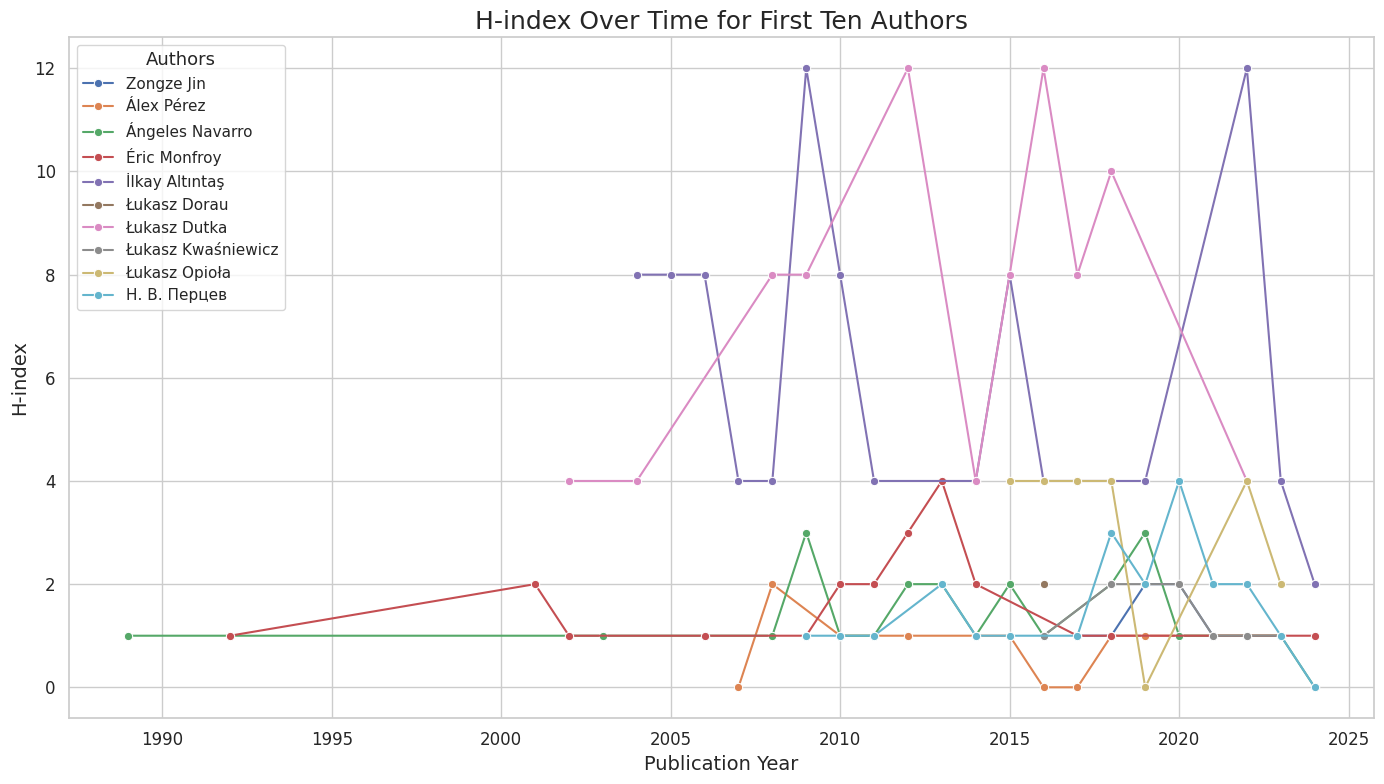

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/author_h_index_per_year.csv')

groups = data.groupby(['display_name', 'publication_year']).sum().reset_index()

first_ten_authors = groups['display_name'].unique()[-10:]
filtered_data = groups[groups['display_name'].isin(first_ten_authors)]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

for author in first_ten_authors:
    author_data = filtered_data[filtered_data['display_name'] == author]
    sns.lineplot(x=author_data['publication_year'], y=author_data['h_index'], marker='o', label=author)

plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('H-index', fontsize=14)
plt.title('H-index Over Time for First Ten Authors', fontsize=18)
plt.legend(title='Authors', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('h_index_plot.png', dpi=300)
plt.show()


тогда найди из них тех, кто до этого уже имел публикации на ICCS (оба). есть такие?

In [ ]:
import pandas as pd
import ast

data = pd.read_csv('/content/publications_ICCS.csv')
data['authorships'] = data['authorships'].apply(ast.literal_eval)

with open('/content/list.txt') as file:
    author_pairs = [line.rstrip() for line in file]
author_pairs = [ast.literal_eval(line) for line in author_pairs]

counter = 0
had_publications = []

for pair in author_pairs:
  author1 = False
  author2 = False
  first_author = data[data['authorships'].apply(lambda x: pair[0] in x)][['authorships','publication_year']].values.flatten().tolist()
  first_author = [first_author[i : i + 2] for i in range(0, len(first_author), 2)]
  second_author = data[data['authorships'].apply(lambda x: pair[1] in x)][['authorships','publication_year']].values.flatten().tolist()
  second_author = [second_author[i : i + 2] for i in range(0, len(second_author), 2)]
  authorships = first_author + second_author
  for authors in authorships:
    if (pair[0] in authors[0]) and (pair[1] not in authors[0]) and (pair[2] > authors[1]):
      author1 = True
      break
  for authors in authorships:
    if (pair[0] in authors[0]) and (pair[1] not in authors[0]) and (pair[2] > authors[1]):
      author2 = True
      break
  if author1 and author2 == True:
    counter += 1
    had_publications.append(pair)

print(counter)
print(len(author_pairs))

29
342


In [ ]:
had_publications

[['Travis Desell', 'Alicia K. Andes', 2015],
 ['Bo Jiang', 'Rongchao Yin', 2016],
 ['Paweł Czarnul', 'Artur Malinowski', 2016],
 ['Jorge González‐Domínguez', 'María J. Martín', 2016],
 ['Jorge González‐Domínguez', 'María J. Martín', 2017],
 ['Jose A. Belloch', 'Jordi Badía', 2017],
 ['Jack Dongarra', 'Sven Hammarling', 2017],
 ['Sanderson L. Gonzaga de Oliveira', 'Diogo T. Robaina', 2018],
 ['Gabriel Spadon', 'Danilo Medeiros Eler', 2018],
 ['Daniele Ramazzotti', 'Marco Antoniotti', 2018],
 ['Paul Manstetten', 'Lukas Gnam', 2018],
 ['Judit Planas', 'Fabien Delalondre', 2018],
 ['Bo Jiang', 'Zhigang Lü', 2018],
 ['Travis Desell', 'Mark Dusenbury', 2018],
 ['Azzam Haidar', 'Ahmad Abdelfattah', 2018],
 ['Jorge González‐Domínguez', 'María J. Martín', 2019],
 ['Zheng Lin', 'Peng Fu', 2019],
 ['Bo Jiang', 'Zhigang Lü', 2019],
 ['Roselyne Tchoua', 'Zhi Hong', 2019],
 ['Yolanda Becerra', 'Raül Sirvent', 2019],
 ['Elise Kuylen', 'Lander Willem', 2019],
 ['Rafael Ferreira da Silva', 'Anne‐Cécile

1) найди все тома ICCS как они были опубликованы (а не с фильтрацией принятых). Для это возьми все тома отсюда (колонка proceedings): https://www.iccs-meeting.org/iccs2024/previous-iccs/ найди их в опеналеске и выгрузи публикации оттуда

2) собери список всех авторов и выгрузи все публикации каждого автора

списки (1) и (2) пришли мне на этом этапе :)

так мы покроем все 24 года конференции

3) ставим задачу так: найти пары людей, у которых а) есть публикации в один год на ICCS без соавторства, б) нет совместных публикаций до этого, в) есть совместная публикация после (не важно где)

In [2]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

opts = webdriver.FirefoxOptions()
opts.add_argument("--headless")

driver = webdriver.Firefox(options=opts)

driver.get('https://www.sciencedirect.com/journal/procedia-computer-science/vol/29')

try:
    wait = WebDriverWait(driver, 30)
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.js-article-list')))
    article_titles = driver.find_elements(By.CLASS_NAME, 'article-content-title')

    article_titles_list = [title.text for title in article_titles]

    print(article_titles_list)
finally:
    driver.quit()

StaleElementReferenceException: Message: The element with the reference b7dfddeb-1ab5-4ec9-afd2-f74d873452a7 is stale; either its node document is not the active document, or it is no longer connected to the DOM; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
StaleElementReferenceError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:725:5
getKnownElement@chrome://remote/content/marionette/json.sys.mjs:401:11
deserializeJSON@chrome://remote/content/marionette/json.sys.mjs:259:20
cloneObject@chrome://remote/content/marionette/json.sys.mjs:59:24
deserializeJSON@chrome://remote/content/marionette/json.sys.mjs:289:16
json.deserialize@chrome://remote/content/marionette/json.sys.mjs:293:10
receiveMessage@chrome://remote/content/marionette/actors/MarionetteCommandsChild.sys.mjs:73:30
